#Task 1

In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 68.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=5cb3234b46b6a8bee579540c7b8e8d79fb33ecfe69ad08389d2db019ae9c877b
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, col, max, countDistinct


In [3]:
spark_session = SparkSession.builder.getOrCreate()

In [4]:
data = spark_session.read.csv('/content/bestsellers with categories.csv', inferSchema=True, header=True)
data.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [5]:
data.filter(col("User Rating") >= 4.7).agg({"Price": "avg"}).show()

+------------------+
|        avg(Price)|
+------------------+
|11.560975609756097|
+------------------+



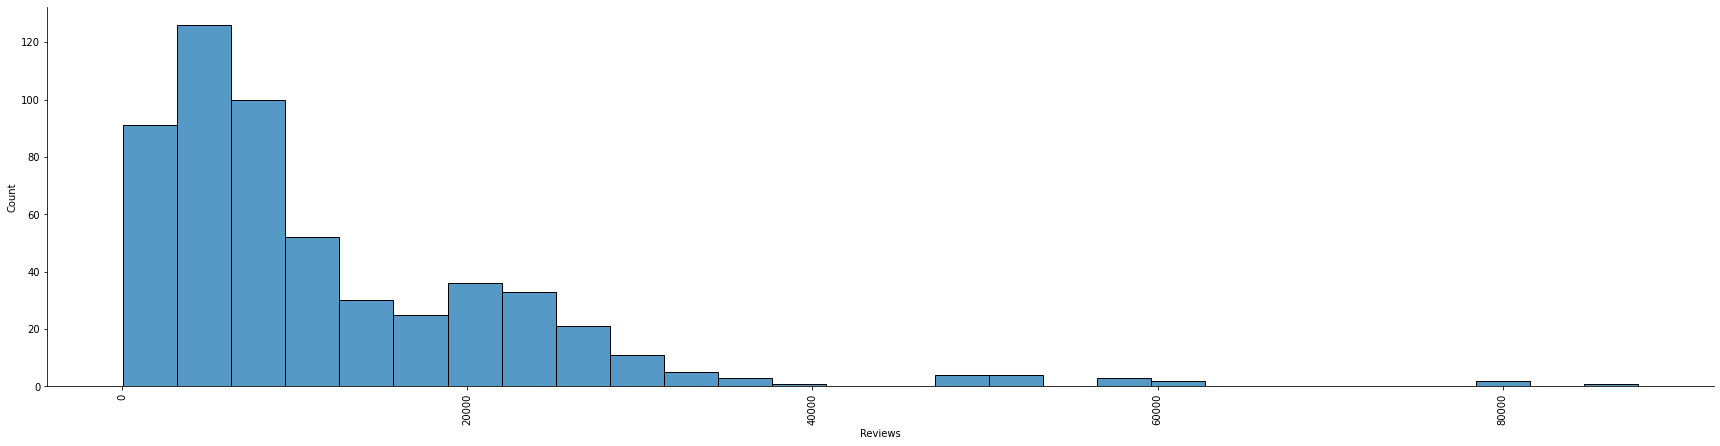

In [6]:
data_pd = data.toPandas()
sns.displot(x= 'Reviews', data=data_pd, height=6, aspect=4/1)
plt.xticks(rotation=90)
plt.show()

In [7]:
data.corr("User Rating", "Price")

-0.13308628728088093

In [8]:
data.corr("Reviews", "Price")

-0.10918188342780513

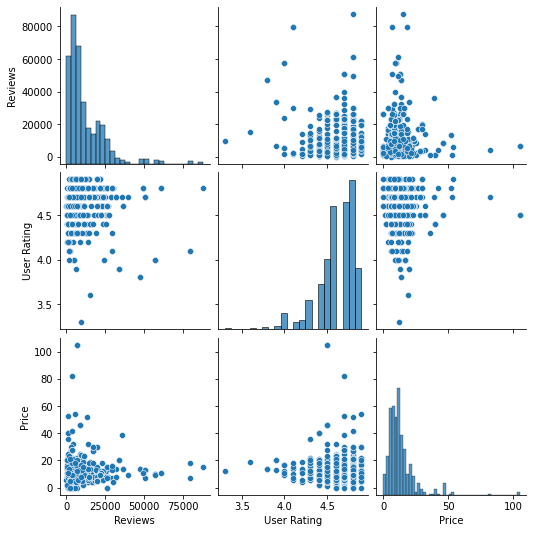

In [9]:
data_pd_new = data_pd[['Reviews', 'User Rating', 'Price']]
sns.pairplot(kind="scatter", data=data_pd_new)


# Task 2

Автор з максимальным рейтингом

In [10]:
author = data.sort(data['User Rating'].desc()).collect()[0]
author["Author"]

'Bill Martin Jr.'

перевірка

In [11]:
data.filter(data['Author'] == "Bill Martin Jr.").show()

+--------------------+---------------+-----------+-------+-----+----+-------+
|                Name|         Author|User Rating|Reviews|Price|Year|  Genre|
+--------------------+---------------+-----------+-------+-----+----+-------+
|Brown Bear, Brown...|Bill Martin Jr.|        4.9|  14344|    5|2017|Fiction|
|Brown Bear, Brown...|Bill Martin Jr.|        4.9|  14344|    5|2019|Fiction|
+--------------------+---------------+-----------+-------+-----+----+-------+



Найдите трех авторов с самым низким рейтингом.

In [12]:
authors_rows = data.sort(data['User Rating'].asc()).collect()[:3]
authors = [x["Author"] for x in authors_rows]
authors

['J.K. Rowling', 'Harper Lee', 'E L James']

Определите какой автор получил наибольшее количество рецензий.

In [13]:
author_reviews = data.sort(data['Reviews'].desc()).collect()[0]
author_reviews["Author"]

'Delia Owens'

Определите какой автор написал наибольшее количество книг за весь доступный в данных период.

In [14]:
books = data.groupBy("Author").count().sort("count", ascending=False).collect()[0]["Author"]
books

'Jeff Kinney'

Определите какая книга жанра "Fiction" имеет самый маленький рейтинг.

In [15]:
fiction_min = data.filter(data["genre"] == 'Fiction').sort("User Rating", ascending=True).collect()[0]["Name"]
fiction_min

'The Casual Vacancy'

Определите какая книга жанра "Non Fiction" имеет самый высокий рейтинг.

In [16]:
nfiction_max = data.filter(data["genre"] == 'Non Fiction').sort("User Rating", ascending=False).collect()[0]["Name"]
nfiction_max

'Hamilton: The Revolution'

# Task 3

Постройте гистограмму среднего количества рецензий по годам. В виде отдельной гистограммы визуализируйте количество книг жанра "Fiction" и "Non Fiction" за весь доступный период.

In [40]:
histo_data = data.groupBy("Year").avg("Reviews").sort("Year", ascending=True)
histo_data_x = [ x["Year"] for x in histo_data]
histo_data_y = [ y["avg(Reviews)"] for y in histo_data]
histo_data.show()

+----+------------+
|Year|avg(Reviews)|
+----+------------+
|2009|     4710.12|
|2010|     5479.62|
|2011|     8100.82|
|2012|    13090.92|
|2013|    13098.14|
|2014|    15859.94|
|2015|    14233.38|
|2016|     14196.0|
|2017|     12888.4|
|2018|    13930.42|
|2019|    15898.34|
+----+------------+



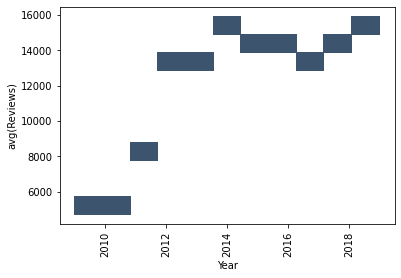

In [46]:
hp_pd = histo_data.toPandas()
sns.histplot(data=hp_pd, x="Year", y="avg(Reviews)", bins=len(hp_pd["Year"]))
plt.xticks(rotation=90)
plt.show()

In [66]:
fiction = data.filter(data["Genre"] == 'Fiction').count()
nfiction = data.filter(data["Genre"] == 'Non Fiction').count()

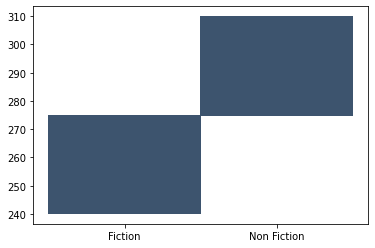

In [71]:
sns.histplot(x=("Fiction", "Non Fiction"), y=(fiction, nfiction))
plt.show()